In [4]:
import os
import shutil
import torch
import argparse
import tarfile
import threading
#from nuimages import NuImages
from ultralytics import YOLO

In [5]:
print("Torch CUDA is available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

# Verifique a disponibilidade da GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Torch CUDA is available: True
CUDA version: 12.4
Using device: cuda


In [3]:
base_dir = 'dataset'
extract_base_dir  = 'condenseDataset'
os.makedirs(extract_base_dir, exist_ok=True)

In [4]:
def extract_tar(tar_path, extract_to):
    try:
        with tarfile.open(tar_path, 'r:gz') as tar:
            tar.getmembers()
            print(f"{tar_path} passou na verificação de integridade.")
            tar.extractall(path=extract_to)
            print(f"Extraído com sucesso: {tar_path}")
    except (tarfile.ReadError, EOFError) as e:
        print(f"Erro ao extrair {tar_path}: {e}. Arquivo ignorado.")

def move_files(source_dir, dest_dir):
    if os.path.exists(source_dir):
        for filename in os.listdir(source_dir):
            source_file = os.path.join(source_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            shutil.move(source_file, dest_file)

In [5]:
for tar_file in os.listdir(base_dir):
    if tar_file.endswith('.tar.gz'):
        tar_path = os.path.join(base_dir, tar_file)
        extract_path = os.path.join(extract_base_dir, tar_file.replace('.tar.gz', ''))
        os.makedirs(extract_path, exist_ok=True)
        extract_tar(tar_path, extract_path)
print("Extração completa! Todos os arquivos válidos foram extraídos para", extract_base_dir)

dataset\n003.tar.gz passou na verificação de integridade.


C:\Users\PC\AppData\Local\Temp\ipykernel_11720\2969126953.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_to)


Extraído com sucesso: dataset\n003.tar.gz
dataset\n004.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n004.tar.gz
dataset\n005.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n005.tar.gz
dataset\n006.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n006.tar.gz
dataset\n008.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n008.tar.gz
dataset\n009.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n009.tar.gz
dataset\n010.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n010.tar.gz
dataset\n013.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n013.tar.gz
dataset\n014.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n014.tar.gz
dataset\n015.tar.gz passou na verificação de integridade.
Extraído com sucesso: dataset\n015.tar.gz
dataset\n016.tar.gz passou na verificação de integridade.


In [8]:
consolidated_dir = 'consolidated_dataset'

In [8]:
consolidated_dir = 'consolidated_dataset' # Caminho para a pasta consolidada onde os dados serão armazenados
os.makedirs(consolidated_dir, exist_ok=True)

# Crie as pastas consolidadas para imagens e labels, com subpastas de treino, validação e teste
for category in ['images', 'labels']:
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(consolidated_dir, category, split), exist_ok=True)

def move_files(source_dir, dest_dir):
    if os.path.exists(source_dir):
        for filename in os.listdir(source_dir):
            source_file = os.path.join(source_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            shutil.move(source_file, dest_file)

# Caminho base onde as pastas dos carros estão localizadas
#extract_base_dir = './dataset/'

for car_folder in os.listdir(extract_base_dir):
    car_path = os.path.join(extract_base_dir, car_folder, 'home', 'jupyter-renan', 'Projeto final IC', 'dataset', 'vehicles', car_folder)

    # Caminhos para as pastas de imagens e labels dentro de cada carro
    images_path = os.path.join(car_path, 'images')
    labels_path = os.path.join(car_path, 'labels')

    # Movendo as imagens para a pasta consolidada
    move_files(os.path.join(images_path, 'train'), os.path.join(consolidated_dir, 'images', 'train'))

    # Verifica se a pasta val existe antes de tentar mover os arquivos
    if os.path.exists(os.path.join(images_path, 'val')):
        move_files(os.path.join(images_path, 'val'), os.path.join(consolidated_dir, 'images', 'val'))
    else:
        print(f"A pasta de validação está ausente em {car_folder}, ignorando.")

    move_files(os.path.join(images_path, 'test'), os.path.join(consolidated_dir, 'images', 'test'))

    # Movendo os labels para a pasta consolidada
    move_files(os.path.join(labels_path, 'train'), os.path.join(consolidated_dir, 'labels', 'train'))

    # Verifica se a pasta val existe antes de tentar mover os arquivos
    if os.path.exists(os.path.join(labels_path, 'val')):
        move_files(os.path.join(labels_path, 'val'), os.path.join(consolidated_dir, 'labels', 'val'))
    else:
        print(f"A pasta de validação de labels está ausente em {car_folder}, ignorando.")

    move_files(os.path.join(labels_path, 'test'), os.path.join(consolidated_dir, 'labels', 'test'))

print("Organização completa! As imagens e labels foram consolidados em", consolidated_dir)

A pasta de validação está ausente em images, ignorando.
A pasta de validação de labels está ausente em images, ignorando.
A pasta de validação está ausente em labels, ignorando.
A pasta de validação de labels está ausente em labels, ignorando.
Organização completa! As imagens e labels foram consolidados em consolidated_dataset


In [9]:
consolidated_dir = 'consolidated_dataset'
os.makedirs(consolidated_dir, exist_ok=True)

for category in ['images', 'labels']:
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(consolidated_dir, category, split), exist_ok=True)

# Função para mover arquivos
def move_files(source_dir, dest_dir):
    if os.path.exists(source_dir):
        for filename in os.listdir(source_dir):
            source_file = os.path.join(source_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            shutil.move(source_file, dest_file)
extract_base_dir = 'condenseDataset'
ignore_folders = {'n016', 'n015', 'n014', 'n013'}
# Iterar sobre cada pasta de carro extraído, ignorando as pastas incompletas
for car_folder in os.listdir(extract_base_dir):
    if car_folder in ignore_folders:
        print(f"Ignorando a pasta {car_folder} devido a dados incompletos.")
        continue
    car_path = os.path.join(extract_base_dir, car_folder, 'home', 'jupyter-renan', 'Projeto final IC', 'dataset', 'vehicles', car_folder)
    # Caminhos para as pastas de imagens e labels dentro de cada carro
    images_path = os.path.join(car_path, 'images')
    labels_path = os.path.join(car_path, 'labels')
    # Movendo as imagens para a pasta consolidada
    move_files(os.path.join(images_path, 'train'), os.path.join(consolidated_dir, 'images', 'train'))
    # Verifica se a pasta val existe antes de tentar mover os arquivos
    if os.path.exists(os.path.join(images_path, 'val')):
        move_files(os.path.join(images_path, 'val'), os.path.join(consolidated_dir, 'images', 'val'))
    else:
        print(f"A pasta de validação está ausente em {car_folder}, ignorando.")
    move_files(os.path.join(images_path, 'test'), os.path.join(consolidated_dir, 'images', 'test'))
    # Movendo os labels para a pasta consolidada
    move_files(os.path.join(labels_path, 'train'), os.path.join(consolidated_dir, 'labels', 'train'))
    # Verifica se a pasta val existe antes de tentar mover os arquivos
    if os.path.exists(os.path.join(labels_path, 'val')):
        move_files(os.path.join(labels_path, 'val'), os.path.join(consolidated_dir, 'labels', 'val'))
    else:
        print(f"A pasta de validação de labels está ausente em {car_folder}, ignorando.")
    move_files(os.path.join(labels_path, 'test'), os.path.join(consolidated_dir, 'labels', 'test'))
print("Organização completa! As imagens e labels foram consolidados em", consolidated_dir)

A pasta de validação está ausente em n004, ignorando.
A pasta de validação de labels está ausente em n004, ignorando.
Ignorando a pasta n013 devido a dados incompletos.
Ignorando a pasta n014 devido a dados incompletos.
Ignorando a pasta n015 devido a dados incompletos.
Ignorando a pasta n016 devido a dados incompletos.
Organização completa! As imagens e labels foram consolidados em consolidated_dataset


In [11]:
# Crie as pastas consolidadas para imagens e labels, com subpastas de treino, validação e teste
for category in ['images', 'labels']:
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(consolidated_dir, category, split), exist_ok=True)

# Função para mover arquivos, ignorando arquivos dataset.yaml
def move_files(source_dir, dest_dir):
    if os.path.exists(source_dir):
        for filename in os.listdir(source_dir):
            if filename != 'dataset.yaml':  # Ignora o arquivo dataset.yaml
                source_file = os.path.join(source_dir, filename)
                dest_file = os.path.join(dest_dir, filename)
                shutil.move(source_file, dest_file)

specific_folders = {'n013', 'n014', 'n015', 'n016'}
base_dir = 'condenseDataset'
for folder in specific_folders:
    folder_path = os.path.join(base_dir, folder, folder)
    # Caminhos para as pastas de imagens e labels dentro de cada uma dessas pastas
    images_path = os.path.join(folder_path, 'images')
    labels_path = os.path.join(folder_path, 'labels')
    # Movendo as imagens para a pasta consolidada
    move_files(os.path.join(images_path, 'train'), os.path.join(consolidated_dir, 'images', 'train'))
    # Verifica se a pasta val existe antes de tentar mover os arquivos
    if os.path.exists(os.path.join(images_path, 'val')):
        move_files(os.path.join(images_path, 'val'), os.path.join(consolidated_dir, 'images', 'val'))
    else:
        print(f"A pasta de validação está ausente em {folder}, ignorando.")
    move_files(os.path.join(images_path, 'test'), os.path.join(consolidated_dir, 'images', 'test'))
    # Movendo os labels para a pasta consolidada
    move_files(os.path.join(labels_path, 'train'), os.path.join(consolidated_dir, 'labels', 'train'))
    # Verifica se a pasta val existe antes de tentar mover os arquivos
    if os.path.exists(os.path.join(labels_path, 'val')):
        move_files(os.path.join(labels_path, 'val'), os.path.join(consolidated_dir, 'labels', 'val'))
    else:
        print(f"A pasta de validação de labels está ausente em {folder}, ignorando.")
    move_files(os.path.join(labels_path, 'test'), os.path.join(consolidated_dir, 'labels', 'test'))
print("Organização completa! As imagens e labels das pastas específicas foram consolidados em", consolidated_dir)


Organização completa! As imagens e labels das pastas específicas foram consolidados em consolidated_dataset


In [9]:
# Função para contar arquivos em uma pasta
def count_files(directory):
    if os.path.exists(directory):
        return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    else:
        return 0

# Contadores para cada subpasta em images e labels
for category in ['images', 'labels']:
    print(f"\nContagem de arquivos na categoria '{category}':")
    for split in ['train', 'val', 'test']:
        folder_path = os.path.join(consolidated_dir, category, split)
        file_count = count_files(folder_path)
        print(f" - {split}: {file_count} arquivos")


Contagem de arquivos na categoria 'images':
 - train: 67279 arquivos
 - val: 16445 arquivos
 - test: 9752 arquivos

Contagem de arquivos na categoria 'labels':
 - train: 67279 arquivos
 - val: 16445 arquivos
 - test: 9752 arquivos


### Verificando as imagens

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

Largura: 1600, Altura: 900


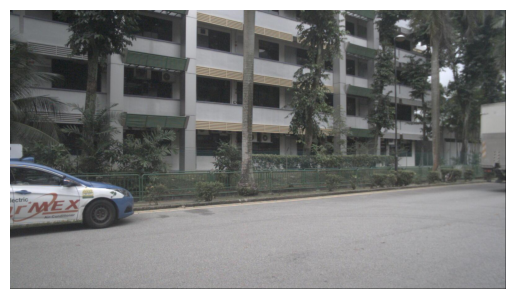

In [15]:
img_path = 'consolidated_dataset/images/test/1514864936124954.jpg'

image = Image.open(img_path)

w, h = image.size
print(f"Largura: {w}, Altura: {h}")
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Função para verificar dimensões das imagens em uma pasta
def check_image_dimensions(directory):
    dimensions = None
    all_same = True
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            with Image.open(file_path) as img:
                current_dimensions = img.size
                if dimensions is None:
                    dimensions = current_dimensions
                elif dimensions != current_dimensions:
                    print(f"Dimensão inconsistente encontrada em {file_path}: {current_dimensions}")
                    all_same = False
    return all_same, dimensions

# Checa cada subpasta de images: train, val, test
for split in ['train', 'val', 'test']:
    folder_path = os.path.join(consolidated_dir, 'images', split)
    if os.path.exists(folder_path):
        all_same, dimensions = check_image_dimensions(folder_path)
        if all_same:
            print(f"Todas as imagens na pasta '{split}' possuem dimensões consistentes: {dimensions}")
        else:
            print(f"Atenção: Nem todas as imagens na pasta '{split}' possuem as mesmas dimensões.")
    else:
        print(f"A pasta '{split}' não existe em '{folder_path}'.")

Todas as imagens na pasta 'train' possuem dimensões consistentes: (1600, 900)
Todas as imagens na pasta 'val' possuem dimensões consistentes: (1600, 900)
Todas as imagens na pasta 'test' possuem dimensões consistentes: (1600, 900)


### Processando

### Treinando YOLOv5

In [1]:
import yaml

In [11]:
yaml_content = {
    'train': 'C:/Users/PC/Documents/Nuimages-yolo/consolidated_dataset/images/train',#'consolidated_dataset/images/train',  # Caminho para imagens de treino
    'val': 'C:/Users/PC/Documents/Nuimages-yolo/consolidated_dataset/images/val',      # Caminho para imagens de validação
    'test': 'C:/Users/PC/Documents/Nuimages-yolo/consolidated_dataset/images/test',    # Caminho para imagens de teste
    'nc': 12,  # Número de classes
    'names': {  # Nomes das classes
        0: 'animal',
        1: 'child',
        2: 'pedestrian',
        3: 'movable_object',
        4: 'trafficcone',
        5: 'bicycle',
        6: 'bus',
        7: 'emergency_vehicle',
        8: 'motorcycle',
        9: 'construction_vehicle',
        10: 'trailer',
        11: 'truck'
    }
}
yaml_path = 'consolidated_dataset/dataset.yaml'
with open(yaml_path, 'w') as file:
    yaml.dump(yaml_content, file, default_flow_style=False)

In [14]:
model = YOLO('yolov5n.pt')  # Altere para 'yolov5m.pt', 'yolov5l.pt', ou 'yolov5x.pt' para modelos maiores

results = model.train(
    data=yaml_path,     # Caminho para o arquivo de configuração do dataset
    imgsz=640,          # Tamanho das imagens
    epochs=100,          # Número de épocas
    batch=16,           # Tamanho do lote (ajuste conforme a memória disponível)
    name='yolov5n_nuimages',
    patience=10
)

PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 9.70MB/s]


Ultralytics 8.3.25  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
engine\trainer: task=detect, mode=train, model=yolov5n.pt, data=consolidated_dataset/dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov5n_nuimages, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 4.55MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytic

train: Scanning C:\Users\PC\Documents\Nuimages-yolo\consolidated_dataset\labels\train.cache... 67279 images, 6630 backgrounds, 0 corrupt: 100%|██████████| 67279/67279 [00:00<?, ?it/s]

train: WARNING  C:\Users\PC\Documents\Nuimages-yolo\consolidated_dataset\images\train\1536646725897155.jpg: 1 duplicate labels removed



val: Scanning C:\Users\PC\Documents\Nuimages-yolo\consolidated_dataset\labels\val.cache... 16445 images, 1565 backgrounds, 1 corrupt: 100%|██████████| 16445/16445 [00:00<?, ?it/s]

val: WARNING  C:\Users\PC\Documents\Nuimages-yolo\consolidated_dataset\images\val\1515057845331004.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.000625]


Plotting labels to runs\detect\yolov5n_nuimages\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\yolov5n_nuimages
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.53G      1.608       1.94      1.149        223        640: 100%|██████████| 4205/4205 [08:39<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:18<00:00,  6.55it/s]


                   all      16444     135988        0.6      0.274      0.295       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.2G       1.55      1.441       1.12        278        640: 100%|██████████| 4205/4205 [08:14<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:13<00:00,  6.98it/s]


                   all      16444     135988      0.569      0.314      0.338      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.18G      1.578      1.362      1.136        148        640: 100%|██████████| 4205/4205 [08:06<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:13<00:00,  7.01it/s]


                   all      16444     135988       0.56      0.325      0.346      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.09G      1.563      1.304      1.134        225        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:12<00:00,  7.13it/s]


                   all      16444     135988      0.616      0.339      0.376      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.46G      1.511      1.228      1.114        139        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:11<00:00,  7.15it/s]


                   all      16444     135988      0.637      0.358      0.399      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.42G      1.483      1.188      1.102        242        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:12<00:00,  7.05it/s]


                   all      16444     135988      0.637      0.372      0.415      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.88G      1.458      1.157      1.092        207        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.29it/s]


                   all      16444     135988      0.658       0.38      0.428      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.16G      1.439      1.133      1.084        205        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.32it/s]


                   all      16444     135988      0.652      0.395      0.437      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.65G      1.428      1.118      1.079        299        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.28it/s]


                   all      16444     135988      0.669      0.392      0.444      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.27G      1.416      1.103      1.074        145        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.33it/s]


                   all      16444     135988      0.666      0.399       0.45      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.87G      1.408      1.093       1.07        189        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.34it/s]


                   all      16444     135988      0.675        0.4      0.454      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.16G      1.401      1.085      1.068        218        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.33it/s]


                   all      16444     135988      0.677      0.403      0.457      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.42G      1.392      1.075      1.063        197        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.33it/s]


                   all      16444     135988      0.682      0.404       0.46       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.25G      1.388      1.068      1.061        174        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.35it/s]


                   all      16444     135988      0.685      0.405      0.462      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.12G      1.386      1.064       1.06        278        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.32it/s]


                   all      16444     135988      0.683      0.407      0.464      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.28G      1.381      1.058      1.058        204        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.34it/s]


                   all      16444     135988      0.685      0.409      0.465      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.43G      1.374      1.051      1.056        253        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.36it/s]


                   all      16444     135988      0.686       0.41      0.466      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.59G      1.366      1.042      1.053        290        640: 100%|██████████| 4205/4205 [08:04<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.34it/s]


                   all      16444     135988      0.689      0.409      0.468      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.81G      1.365       1.04      1.053        226        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:10<00:00,  7.33it/s]


                   all      16444     135988      0.687      0.411      0.469      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.87G      1.363      1.038      1.052        268        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.37it/s]


                   all      16444     135988      0.685      0.414      0.471      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.47G      1.362      1.032      1.049        190        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.35it/s]


                   all      16444     135988      0.689      0.413      0.471      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       3.1G      1.358      1.031      1.049        232        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.35it/s]


                   all      16444     135988      0.691      0.414      0.473       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       4.1G      1.357      1.028      1.049        276        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.37it/s]


                   all      16444     135988      0.693      0.414      0.474      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.99G      1.352      1.022      1.046        215        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.36it/s]


                   all      16444     135988      0.694      0.416      0.475      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.6G      1.351      1.021      1.046        185        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.39it/s]


                   all      16444     135988      0.697      0.416      0.476      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.38G      1.345      1.013      1.044        306        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.39it/s]


                   all      16444     135988      0.697      0.418      0.477      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.74G      1.347      1.015      1.043        212        640: 100%|██████████| 4205/4205 [08:05<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.39it/s]


                   all      16444     135988        0.7      0.419      0.479      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.89G      1.344      1.011      1.042        173        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.38it/s]


                   all      16444     135988      0.702      0.419       0.48      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.24G      1.342       1.01      1.041        242        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.39it/s]


                   all      16444     135988      0.703       0.42      0.481      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.81G       1.34      1.007      1.041        239        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.39it/s]


                   all      16444     135988      0.702      0.422      0.482      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.94G      1.337      1.005       1.04        211        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.43it/s]


                   all      16444     135988      0.698      0.426      0.483      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.85G      1.335      1.003      1.038        186        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.44it/s]


                   all      16444     135988      0.698      0.427      0.484      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.38G      1.331     0.9965      1.037        186        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.40it/s]


                   all      16444     135988      0.698      0.429      0.485        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.16G      1.331     0.9962      1.037        276        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.41it/s]


                   all      16444     135988      0.697       0.43      0.486      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.34G      1.332     0.9947      1.036        209        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.43it/s]


                   all      16444     135988      0.697      0.431      0.488      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.19G      1.326     0.9907      1.035        182        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.44it/s]


                   all      16444     135988        0.7      0.432      0.489      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.21G      1.326     0.9897      1.034        183        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.44it/s]


                   all      16444     135988      0.699      0.433       0.49      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.86G      1.323     0.9867      1.034        170        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.41it/s]


                   all      16444     135988      0.704      0.433      0.491      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.91G      1.322     0.9843      1.033        186        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.43it/s]


                   all      16444     135988      0.707      0.432      0.491      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.04G       1.32     0.9822      1.032        124        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.45it/s]


                   all      16444     135988      0.701      0.435      0.492      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         4G      1.319     0.9826      1.032        261        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.43it/s]


                   all      16444     135988      0.702      0.436      0.494      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.34G       1.32     0.9827      1.032        385        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.41it/s]


                   all      16444     135988      0.704      0.435      0.494      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.91G      1.316     0.9775       1.03        145        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.42it/s]


                   all      16444     135988      0.709      0.436      0.495      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.17G      1.314     0.9759       1.03        174        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:13<00:00,  7.03it/s]


                   all      16444     135988      0.709      0.438      0.497      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.32G      1.313     0.9739      1.029        161        640: 100%|██████████| 4205/4205 [07:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.52it/s]


                   all      16444     135988      0.714      0.437      0.497      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.75G      1.308     0.9696      1.028        183        640: 100%|██████████| 4205/4205 [09:55<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:30<00:00,  5.65it/s]


                   all      16444     135988      0.715      0.437      0.498      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.15G      1.306     0.9673      1.027        324        640: 100%|██████████| 4205/4205 [10:40<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:30<00:00,  5.66it/s]


                   all      16444     135988      0.714      0.437      0.498       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.81G      1.303     0.9643      1.026        160        640: 100%|██████████| 4205/4205 [10:40<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:30<00:00,  5.66it/s]


                   all      16444     135988      0.716      0.437      0.499       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.62G      1.306     0.9659      1.026        180        640: 100%|██████████| 4205/4205 [10:40<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:30<00:00,  5.65it/s]


                   all      16444     135988      0.717      0.437        0.5      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.27G      1.302     0.9622      1.025        282        640: 100%|██████████| 4205/4205 [10:43<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:34<00:00,  5.43it/s]


                   all      16444     135988      0.722      0.436      0.501      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.79G        1.3     0.9585      1.025        273        640: 100%|██████████| 4205/4205 [11:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:34<00:00,  5.47it/s]


                   all      16444     135988      0.718      0.439      0.502      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.38G      1.301     0.9603      1.025        163        640: 100%|██████████| 4205/4205 [11:11<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:33<00:00,  5.47it/s]


                   all      16444     135988      0.718      0.439      0.502      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.51G      1.296     0.9551      1.022        205        640: 100%|██████████| 4205/4205 [11:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:34<00:00,  5.44it/s]


                   all      16444     135988      0.717       0.44      0.503      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.75G      1.294     0.9528      1.022        144        640: 100%|██████████| 4205/4205 [11:10<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:34<00:00,  5.47it/s]


                   all      16444     135988      0.721      0.439      0.504      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.21G      1.296     0.9532      1.022        271        640: 100%|██████████| 4205/4205 [11:09<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:33<00:00,  5.50it/s]


                   all      16444     135988      0.723      0.439      0.504      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.61G      1.292       0.95      1.021        212        640: 100%|██████████| 4205/4205 [11:10<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:33<00:00,  5.49it/s]


                   all      16444     135988      0.722       0.44      0.505      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.91G      1.291     0.9472      1.019        201        640: 100%|██████████| 4205/4205 [09:32<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:34<00:00,  5.47it/s]


                   all      16444     135988      0.719      0.443      0.506      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.48G      1.289      0.948      1.019        217        640: 100%|██████████| 4205/4205 [10:52<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.48it/s]


                   all      16444     135988      0.716      0.445      0.507      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.89G      1.287     0.9433      1.019        188        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.716      0.446      0.507      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.63G      1.285     0.9411      1.018        332        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.714      0.448      0.508      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.46G      1.285     0.9413      1.019        224        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.713      0.449      0.509      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.56G      1.279     0.9353      1.017        150        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.714      0.449      0.509      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.01G      1.279     0.9352      1.016        254        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.712      0.451       0.51      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.07G      1.278      0.934      1.016        178        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.712      0.452      0.511      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.45G      1.276     0.9316      1.015        167        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.45it/s]


                   all      16444     135988      0.714      0.453      0.511      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.99G      1.275     0.9286      1.014        232        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.714      0.453      0.512       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.86G      1.272     0.9271      1.014        146        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.717      0.452      0.512       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.41G      1.268     0.9214      1.011        226        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988       0.72      0.451      0.513      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.49G       1.27     0.9216      1.011        320        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.47it/s]


                   all      16444     135988      0.721      0.452      0.514      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.59G      1.265     0.9198       1.01        176        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.724      0.452      0.515      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.34G      1.263     0.9168      1.009        257        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.48it/s]


                   all      16444     135988      0.722      0.455      0.515      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.66G      1.262      0.915      1.009        156        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.724      0.456      0.516      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.08G      1.261     0.9119      1.009        193        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.726      0.455      0.517      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.04G      1.259     0.9105      1.008        139        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.726      0.454      0.517      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.5G      1.254     0.9058      1.006        211        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.726      0.457      0.518      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.06G      1.253     0.9053      1.006        199        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.53it/s]


                   all      16444     135988      0.727      0.457      0.519      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.66G       1.25     0.9018      1.005        161        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.633      0.459      0.519      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.39G       1.25     0.8996      1.003        207        640: 100%|██████████| 4205/4205 [08:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.50it/s]


                   all      16444     135988      0.637      0.456       0.52      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.99G      1.248     0.8985      1.004        279        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.641      0.455      0.521      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.76G      1.244     0.8951      1.002        265        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.50it/s]


                   all      16444     135988      0.639      0.457      0.521      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.45G      1.243     0.8923      1.001        228        640: 100%|██████████| 4205/4205 [08:04<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.638      0.457      0.522      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.62G       1.24     0.8879          1        152        640: 100%|██████████| 4205/4205 [08:05<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.637      0.459      0.523      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.49G      1.236      0.885      1.001        250        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.46it/s]


                   all      16444     135988      0.638      0.459      0.523      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.62G      1.234      0.882     0.9985        283        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:09<00:00,  7.40it/s]


                   all      16444     135988      0.637       0.46      0.524      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.78G      1.232     0.8798     0.9978        198        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.50it/s]


                   all      16444     135988      0.639       0.46      0.524      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.01G      1.229     0.8774     0.9962        217        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.639      0.462      0.525       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.67G      1.225     0.8738      0.995        234        640: 100%|██████████| 4205/4205 [08:04<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.47it/s]


                   all      16444     135988      0.662      0.463      0.526       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.99G      1.223     0.8726      0.994        188        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.52it/s]


                   all      16444     135988      0.665      0.461      0.526       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.51G       1.22     0.8667     0.9933        223        640: 100%|██████████| 4205/4205 [08:04<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.661      0.462      0.527      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.47G      1.218     0.8643     0.9923        187        640: 100%|██████████| 4205/4205 [08:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.669      0.463      0.528      0.331
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         3G      1.216     0.8485     0.9917        126        640: 100%|██████████| 4205/4205 [07:44<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.674      0.463      0.528      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.77G       1.21     0.8412     0.9889        101        640: 100%|██████████| 4205/4205 [07:44<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.53it/s]


                   all      16444     135988      0.673      0.463      0.528      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.33G      1.206     0.8355     0.9875        100        640: 100%|██████████| 4205/4205 [07:43<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.48it/s]


                   all      16444     135988      0.671      0.464      0.529      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.42G      1.201     0.8294     0.9859         56        640: 100%|██████████| 4205/4205 [07:44<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.54it/s]


                   all      16444     135988      0.679      0.463      0.529      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.17G      1.198     0.8259     0.9839        117        640: 100%|██████████| 4205/4205 [07:43<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.51it/s]


                   all      16444     135988      0.677      0.465      0.529      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.96G      1.192     0.8202     0.9828         81        640: 100%|██████████| 4205/4205 [07:43<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.53it/s]


                   all      16444     135988      0.679      0.464       0.53      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.96G       1.19     0.8168     0.9819        146        640: 100%|██████████| 4205/4205 [07:44<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.50it/s]


                   all      16444     135988      0.677      0.465       0.53      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.76G      1.185      0.811     0.9798        161        640: 100%|██████████| 4205/4205 [07:43<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.50it/s]


                   all      16444     135988      0.676      0.466      0.531      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.5G      1.179     0.8058     0.9782         82        640: 100%|██████████| 4205/4205 [07:43<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.677      0.466      0.531      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.97G      1.174     0.8033     0.9762        118        640: 100%|██████████| 4205/4205 [07:43<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:08<00:00,  7.49it/s]


                   all      16444     135988      0.681      0.466      0.531      0.334

100 epochs completed in 16.051 hours.
Optimizer stripped from runs\detect\yolov5n_nuimages\weights\last.pt, 5.3MB
Optimizer stripped from runs\detect\yolov5n_nuimages\weights\best.pt, 5.3MB

Validating runs\detect\yolov5n_nuimages\weights\best.pt...
Ultralytics 8.3.25  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
YOLOv5n summary (fused): 193 layers, 2,505,284 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 514/514 [01:37<00:00,  5.27it/s]


                   all      16444     135988       0.68      0.466      0.531      0.334
                 child        189        251       0.42     0.0289     0.0309     0.0164
            pedestrian       8466      32459      0.732      0.468      0.555       0.29
        movable_object       3782      20391      0.703      0.566      0.624      0.389
           trafficcone       4526      18587       0.79      0.613      0.686      0.388
               bicycle       2341       3352      0.725      0.568      0.639      0.403
                   bus       1511       1885      0.764      0.444      0.543      0.401
     emergency_vehicle      10901      47322      0.759      0.714       0.78      0.539
            motorcycle       2330       3097      0.746      0.641      0.714      0.452
  construction_vehicle       1110       1301      0.625      0.364      0.426      0.222
               trailer        366        486      0.531       0.23      0.273      0.169
                 truc